## Install Pyranda package from github

In [1]:
pip install mpi4py

     |████████████████████████████████| 1.4MB 2.8MB/s 
  Created wheel for mpi4py: filename=mpi4py-3.0.3-cp36-cp36m-linux_x86_64.whl size=2074429 sha256=536bdcc2b51d025d27b3954f8c37626cb6dfa24b19b0ffbdf4d6c5f91afc0997
  Stored in directory: /root/.cache/pip/wheels/18/e0/86/2b713dd512199096012ceca61429e12b960888de59818871d6
Successfully built mpi4py


In [ ]:
pip install https://github.com/LLNL/pyranda/archive/master.zip

###Import pyranda, setup, run, and plot


 
                                 _       
                                | |      
 _ __  _   _ _ __ __ _ _ __   __| | __ _ 
| '_ \| | | | '__/ _` | '_ \ / _` |/ _` |
| |_) | |_| | | | (_| | | | | (_| | (_| |
| .__/ \__, |_|  \__,_|_| |_|\__,_|\__,_|
| |     __/ |                            
|_|    |___/                             

Version 1.0

Copyright (c) 2020 Lawrence Livermore National Laboratory (LLNL-CODE-749864)
All rights reserved. 
For details about use and distribution, please read: pyranda/LICENSE

Adding variables: c
Adding variables: phi
Adding equations of motion: 
(1)    ddt(:phi:)  =  -:c: * ddx(:phi:) 


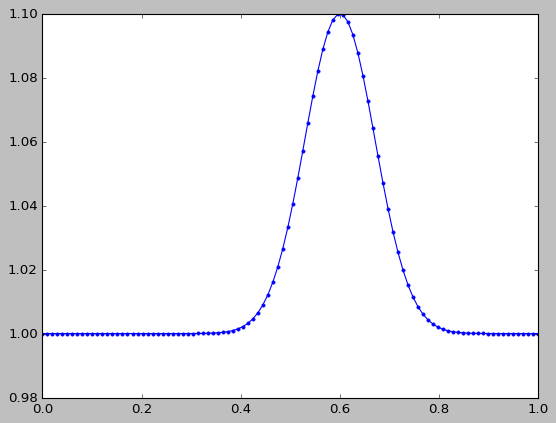

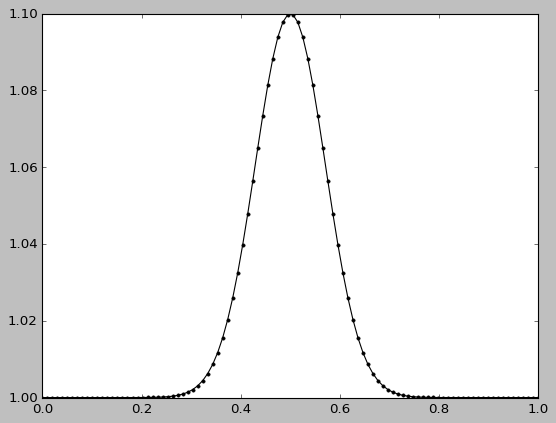

In [ ]:
from pyranda import pyrandaSim

# Define the domain/mesh
domain = "xdom = (0.0 , 1.0 , 100 )"

# Initialize a simulation object on a mesh
pysim = pyrandaSim('advection',domain)

# Define the equations of motion
pysim.EOM(" ddt(:phi:)  =  -:c: * ddx(:phi:) ")

# Initialize variables
ic = """
:phi: = 1.0 + 0.1 * exp( -(abs(meshx-.5)/.1 )**2 )
:phi0: = :phi:
:c:   = 1.0
"""
pysim.setIC(ic)

# Integrate in time
dt = .001 
time = 0.0
while time < .1:
    time = pysim.rk4(time,dt)


# Plot the initial/final solution
pysim.plot.plot('phi' ,'b.-' )
pysim.plot.plot('phi0','k.-')